In [66]:
# Francisco Dominguez Mateos
# 29/08/2021
# Voice Stress detection
# LDA vs PCA

In [67]:
import glob
import time
import numpy as np
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [68]:
path_base="/home/francisco/datasets/datasets/sound/voice/stress"

In [69]:
def getLabel(s):
    if s=="TRUE":
        return 1.0
    if s=="FALSE":
        return 0.0
    if s=="PC":
        return 2.0
def isRightLabel(s):
    if s=="TRUE":
        return True
    if s=="FALSE":
        return True
    if s=="PC":
        return False
    return False

In [70]:
data=[]
labels=[]
file_txt=path_base+"/*.csv"
for filepath in glob.glob(file_txt):
    print("Processing file: {}".format(filepath)) 
    with open(filepath) as fp:  
        line = fp.readline()
        head_list=line.split(";")
        #for i,head in enumerate(head_list):
        #    print(i,head)
        cnt = 1
        line = fp.readline()
        while line:
            data_row=[]
            line_list=line.split(";")
            #print("Line {}: {} {} {}".format(cnt, line_list[0], line_list[1], line_list[2]))
            line = fp.readline()
            cnt += 1
            if not isRightLabel(line_list[0]):
                continue
            for i,datum in enumerate(line_list):
                #print(i,head_list[i],"=",datum)
                if i>1:
                    data_row.append(float(datum))
                if i==0:
                    labels.append(getLabel(datum))
            data.append(data_row)
data_np=np.array(data)
labels_np=np.array(labels)
print(data_np.shape)
print(data_np)
print(labels_np.shape)
print(labels_np)

Processing file: /home/francisco/datasets/datasets/sound/voice/stress/Set_Males.csv
Processing file: /home/francisco/datasets/datasets/sound/voice/stress/Set_Females.csv
(50, 68)
[[126.278 0.014 0.029 ... 15.681 0.870 0.012]
 [142.901 0.005 0.019 ... 10.834 0.936 0.008]
 [117.189 0.005 0.014 ... 11.765 0.967 0.006]
 ...
 [192.269 0.008 0.022 ... 10.600 0.928 0.007]
 [167.700 0.005 0.025 ... 9.564 0.933 0.009]
 [206.086 0.007 0.013 ... 9.851 0.922 0.046]]
(50,)
[1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000]


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
ss=StandardScaler()
data_ss=ss.fit_transform(data_np)

print(data_ss.shape)
print(data_ss)

(50, 68)
[[-0.692 1.335 0.942 ... 1.056 -1.550 -0.524]
 [-0.309 -0.907 -0.100 ... -0.261 0.011 -0.808]
 [-0.901 -0.907 -0.621 ... -0.008 0.744 -0.950]
 ...
 [0.826 -0.159 0.213 ... -0.325 -0.178 -0.879]
 [0.261 -0.907 0.525 ... -0.606 -0.060 -0.737]
 [1.144 -0.409 -0.725 ... -0.528 -0.320 1.895]]


In [73]:
from sklearn.decomposition import PCA

In [74]:
pca=PCA(2,whiten=True)
data_ss=pca.fit_transform(data_np)
print(data_ss.shape)

(50, 2)


In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
import matplotlib.pyplot as plt

(50, 1)
explained variance ratio (first two components): [0.500 0.500]


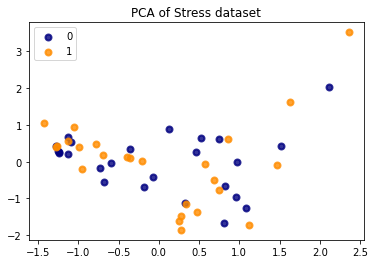

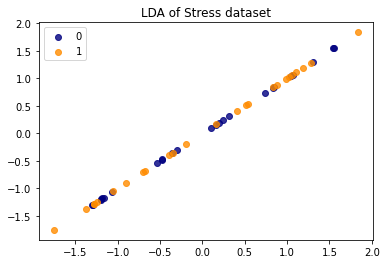

In [88]:
X = data_ss
y = labels_np

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X, y).transform(X)
print(X_r2.shape)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'darkorange','turquoise']
lw = 2

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Stress dataset')

plt.figure()
for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 0], alpha=.8, color=color,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Stress dataset')

plt.show()

(50, 2)


Text(0.5, 1.0, 'NCA of Stress dataset')

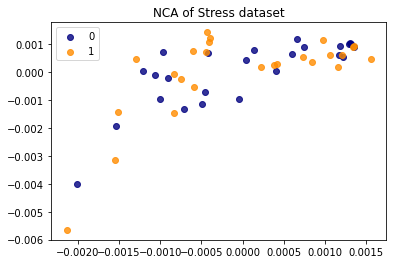

In [89]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
random_state = 0
# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca =NeighborhoodComponentsAnalysis(n_components=2,random_state=random_state)
X_r3 = nca.fit(X, y).transform(X)
print(X_r3.shape)

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], alpha=.8, color=color,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('NCA of Stress dataset')


In [94]:
data_pairs=[]
data_pair_labels=[]
N=data_ss.shape[0]
for i in range(N):
    for j in range(i+1,N):
        data_pairs.append((data_ss[i],data_ss[j]))
        label=labels_np[i]==labels_np[j]
        data_pair_labels.append(label)
data_pairs_np=np.array(data_pairs)
data_pair_labels_np=np.array(data_pair_labels)
print(data_pairs_np.shape)
print(data_pair_labels_np.shape)

(1225, 2, 2)
(1225,)


In [79]:
import numpy as onp
import jax.numpy as np
from jax import grad, jit, vmap, value_and_grad
from jax import random
from jax.experimental import stax
from jax.experimental.stax import (BatchNorm, Conv, Dense, Flatten, Dropout,
                                   Relu, LogSoftmax)

In [80]:
# Import some additional JAX and dataloader helpers
from jax.scipy.special import logsumexp
from jax.experimental import optimizers

In [81]:
#Test if JAX is using CPU or GPU
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

cpu


In [11]:
# Generate key which is used to generate random numbers
key = random.PRNGKey(1)

In [12]:
num_classes = 2
hidden=10
dropout_rate=0.25
def makeNet(num_classes,hidden,dropout_rate,mode="train"):
    init_fun, net = stax.serial(
        Dense(hidden),
        #BatchNorm(axis=0),
        Relu,
        #Dropout(dropout_rate,mode=mode),
        #Dense(hidden),
        #BatchNorm(axis=0),
        #Relu,
        Dropout(dropout_rate,mode=mode),
        Dense(hidden),
        Dense(num_classes),
        LogSoftmax)
    return init_fun,net

In [13]:
init_fun, net=makeNet(num_classes,hidden,dropout_rate)
input_shape=(-1,)+ data_ss.shape[1:]
output_shape, params = init_fun(key, input_shape)
print("ouput_shape=",output_shape)
_,netTest=makeNet(num_classes,hidden,dropout_rate,mode='test')

ouput_shape= (-1, 2)


In [14]:
def one_hot(x, k, dtype=np.float32):
    """Create a one-hot encoding of x of size k """
    return np.array(x[:, None] == np.arange(k), dtype)

def loss(params, data, targets,key):
    preds = net(params, data,rng=key)
    return -np.sum(preds * targets)

def predict(params,data,key):
    preds=netTest(params,data,rng=key)
    return np.exp(preds)

def accuracy(p,targets):
    target_class    = np.argmax(targets, axis=1)
    predicted_class = np.argmax(p      , axis=1)
    acc_total       = np.sum(predicted_class == target_class)
    return acc_total/p.shape[0]


In [15]:
step_size = 1e-3
opt_init, opt_update, get_params = optimizers.adam(step_size)
opt_state = opt_init(params)
num_epochs = 2

In [16]:
@jit
def update(params, x, y, opt_state,key):
    """ Compute the gradient for a batch and update the parameters """
    value, grads = value_and_grad(loss)(params, x, y,key)
    opt_state = opt_update(0, grads, opt_state)
    return get_params(opt_state), opt_state, value

In [17]:
labels_onehot=one_hot(labels_np,num_classes)
print(labels_onehot.shape)
def run_training_loop(data_ss,labels_onehot,num_epochs, opt_state,verbose=False):
    """ Implements a learning loop over epochs. """
    # Get the initial set of parameters
    params = get_params(opt_state)

    # Loop over the training epochs
    for epoch in range(num_epochs):
        start_time = time.time()
        params, opt_state, loss = update(params, data_ss, labels_onehot, opt_state,key)
        epoch_time = time.time() - start_time
        if verbose: print("Epoch {} | T: {:0.2f} | loss: {:0.3f} ".format(epoch+1, epoch_time,
                                                                    loss))
    return loss,params

(50, 2)


In [18]:
l,params=run_training_loop(data_ss,labels_onehot,2000,opt_state,False)
print(l)

15.281156


In [19]:
def _numpy_delete(x, idx):
    """
    Gets the subarray from `x` where data from index `idx` on the first axis is removed.
    """
    # NB: numpy.delete is not yet available in JAX
    mask = np.arange(x.shape[0] - 1) < idx
    return np.where(mask.reshape((-1,) + (1,) * (x.ndim - 1)), x[:-1], x[1:])
def allButOne(x,y,i):
    global key
    oneX=x[i:i+1] #this return a (1,N) shape vs x[i] gives (N,) shape
    oneY=y[i:i+1]
    allXBut=_numpy_delete(x,i)
    allYBut=_numpy_delete(y,i)
    rng,key=random.split(key)
    idxs=allXBut.shape[0]
    suffleIdx=random.permutation(rng,idxs)
    allXBut=allXBut[suffleIdx]
    allYBut=allYBut[suffleIdx]
    return allXBut,allYBut,oneX,oneY

In [20]:
allXBut,allYBut,oneX,oneY=allButOne(data_ss,labels_onehot,1)
print(allXBut.shape)
print(allYBut.shape)
print(oneX.shape)
print(oneY.shape)
oneY

(49, 68)
(49, 2)
(1, 68)
(1, 2)


DeviceArray([[0.000, 1.000]], dtype=float32)

In [ ]:
accT=0
for i in range(data_ss.shape[0]):
    allXBut,allYBut,oneX,oneY=allButOne(data_ss,labels_onehot,i)
    loss,params=run_training_loop(allXBut,allYBut,20000,opt_state)
    p=predict(params,oneX,key)
    acc=accuracy(p,oneY)
    accT+=acc
    print("i=",i,p,oneY,"acc={0:0.3f} accMean={1:0.3f} loss={2:0.3f}".format(acc,accT/(i+1),loss))
print("accMean={0:0.3f}".format(accT/(data_ss.shape[0])))

i= 0 [[0.103 0.897]] [[0.000 1.000]] acc=1.000 accMean=1.000 loss=15.145
i= 1 [[0.006 0.994]] [[0.000 1.000]] acc=1.000 accMean=1.000 loss=19.121
i= 2 [[0.005 0.995]] [[0.000 1.000]] acc=1.000 accMean=1.000 loss=14.487
i= 3 [[0.994 0.006]] [[0.000 1.000]] acc=0.000 accMean=0.750 loss=8.699
i= 4 [[0.270 0.730]] [[0.000 1.000]] acc=1.000 accMean=0.800 loss=12.028
i= 5 [[0.270 0.730]] [[0.000 1.000]] acc=1.000 accMean=0.833 loss=13.367
i= 6 [[0.018 0.982]] [[0.000 1.000]] acc=1.000 accMean=0.857 loss=10.299
i= 7 [[1.000 0.000]] [[0.000 1.000]] acc=0.000 accMean=0.750 loss=12.949
i= 8 [[0.153 0.847]] [[0.000 1.000]] acc=1.000 accMean=0.778 loss=10.225
i= 9 [[0.029 0.971]] [[0.000 1.000]] acc=1.000 accMean=0.800 loss=15.276
i= 10 [[0.065 0.935]] [[1.000 0.000]] acc=0.000 accMean=0.727 loss=11.791
i= 11 [[0.125 0.875]] [[1.000 0.000]] acc=0.000 accMean=0.667 loss=17.323
i= 12 [[0.000 1.000]] [[1.000 0.000]] acc=0.000 accMean=0.615 loss=11.457
i= 13 [[0.565 0.435]] [[1.000 0.000]] acc=1.000 a